# Here we look find the distance to pulsar J0437

In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al. 2012

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    NB, r > 0
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

def gaussian(x, mu, sig):
    """
    a gaussian function
    """
    #x = x/1000
    ans = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return ans

In [5]:
def pOfR3(r, px, dpx, alpha, beta, L):
    #r = r/1000
    #distance prior
    exponent2= -(r/L)**alpha
    prior= (1/(gamma((beta+1)/alpha)))*(alpha/(L**(beta+1)))*((r/1000)**beta)*np.exp(exponent2)
    #likelihood (equation 2) 
    exponent = (-1/(2*(dpx**2)))*(px--0.017-(1/(r/1000)))**2
    P = (1/(dpx*sqrt(2*pi)))*np.exp(exponent)
    ans=P*prior
    return ans

In [7]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J0437-4715 parallax measurements

In [8]:
#SNR
7.100758956026110/0.52452594

13.537479111187732

In [9]:
# Deller et al. 2008
pxD08 = 6.396 
pxD08err = 0.054

In [10]:
# Reardon px
pxR = 6.37 
pxRerr = 0.09

In [11]:
# Dk (pc) from PPTA, Reardon et al. 2016
R16 = 156.79
R16err = 0.25

In [12]:
# Gaia parallax DR2
pxGDR2 = 8.325 - wzp
pxGDR2err = 0.6777
Lsph=0.432138759729853

In [13]:
# parallax distance measurement from VLBI observations
#d_pi_PTA_0437 = 156.3 
#eplus_pi_PTA_0437 = 1.3   # error on this
#eminus_pi_PTA_0437 = 1.3   # error on this

In [14]:
#Gaia parallax EDR3
#Gaia3_px=[]
pxGEDR3 = 7.100758956026110 
pxGEDR3err = 0.52452594
alpha=0.204913351029741
beta=4.82473712409893
L=7.80639184771093E-05
# BJ 2020 reports the median distance to be 142.08081100 pc

In [15]:
pxmax = 1
pxmin = 20
gx = np.linspace(pxmax,pxmin, 10000)

In [16]:
dx = np.linspace(50, 1000, 100000)

In [17]:
mx= np.linspace(50, 2000, 100000)

In [18]:
px=np.linspace(4, 10, 10000)

In [19]:
Gaia3_p=sp.stats.norm.pdf(px, pxGEDR3, pxGEDR3err)
Gaia2_p=sp.stats.norm.pdf(px, pxGDR2, pxGDR2err)
Rearp=sp.stats.norm.pdf(px, pxR, pxRerr)
Dep=sp.stats.norm.pdf(px, pxD08, pxD08err)
combo3px=Gaia3_p*Rearp*Dep
combo2px=Gaia2_p*Rearp*Dep
#for x in px:
 #   Gaia3_px.append(np.norm(x, pxGEDR3, pxGEDR3err))

In [20]:
#areaGaia3px = simps(Gaia3_px, px)
#Gaia3_px=Gaia3_px/areaGaia3px
#Gaia3_px=

In [21]:
Gaia3_px=Gaia3_p/simps(Gaia3_p, px)
Gaia2_px=Gaia2_p/simps(Gaia2_p, px)
Rearpx=Rearp/simps(Rearp, px)
Depx=Dep/simps(Dep, px)
c3px_norm=combo3px/simps(combo3px, px)
c2px_norm=combo2px/simps(combo2px, px)

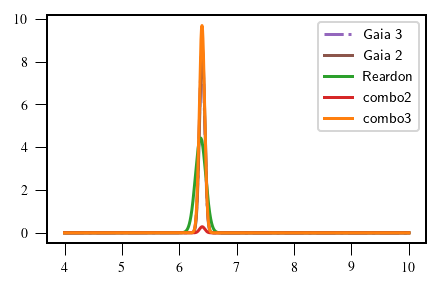

In [22]:
fig, ax1 = plt.subplots()
#dx, np.array(dist_px1024.pdf(px1024)
plt.plot(px, c3px_norm, label='Gaia 3', color = "C4", linestyle='-.')
plt.plot(px, c2px_norm, label='Gaia 2', color = "C5")#, linestyle='-.')
plt.plot(px, Rearpx, label = 'Reardon', color = "C2")#, linestyle='-.')
plt.plot(px, combo2px, label='combo2', color = "C3")
plt.plot(px, combo3px, label='combo3', color = "C1")
plt.legend()
#plt.plot(Gaia3_px)

In [23]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c3px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c3px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50


6.394239423942395

In [24]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c3px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c3px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

6.348634863486349

In [25]:
c3px=per_50
c3pxerr=per_50-per_16

In [26]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c2px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c2px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50


6.397839783978398

In [27]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c2px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c2px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

6.352235223522353

In [28]:
c2px=per_50
c2pxerr=per_50-per_16

In [29]:
valGDR2 = []
valD08 = []
valR16 = []
valGEDR3 = []
valc3 =[]
valc2 =[]

# Gaia EDR3
for ww in dx:
    valGEDR3.append(pOfR3(ww, pxGEDR3, pxGEDR3err, alpha, beta, L))

# Gaia DR2
for xx in dx:
    valGDR2.append(pOfR(xx, pxGDR2, pxGDR2err, Lsph))

# D08
for yy in dx:
    valD08.append(sp.stats.norm.pdf(yy, 156.3, 1.3))

# R16, Pb_dot binary orbital period distance estimator
for zz in dx:
    valR16.append(sp.stats.norm.pdf(zz, R16, R16err))

for ww in dx:
    valc3.append(pOfR3(ww, c3px, c3pxerr, alpha, beta, L))
                 
for ll in dx:
    valc2.append(pOfR(ll, c2px, c2pxerr, Lsph))

In [30]:
valc3=np.array(valc3)*np.array(valR16)
valc2=np.array(valc2)*np.array(valR16)

In [31]:
areaT = trapz(valD08, dx) # are curves really normalized to 1?
areabj=simps(valGDR2, dx)
areaS = simps(valGEDR3, dx) # do this two ways to make sure it's done correctly
areac3=simps(valc3, dx)
areac2=simps(valc2, dx)

In [32]:
# dispersion measure distance from NE 2001
d_DM_NE = 138.89317

# YMW 16 DM model
d_DM_YMW = 156.10378 


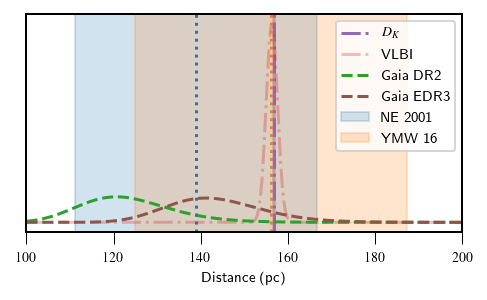

In [35]:
fig, ax1 = plt.subplots()
#plt.plot(dx, np.array(valR16), label = r"$D_K$", color = "C4", linestyle='-.')
plt.axvline(156.79, label = r"$D_K$", color = "C4", linestyle='-.') 
ax1.axvspan(156.79-.25, 156.79+.25, alpha=0.3, color = "C4")



plt.plot(dx, np.array(valD08)/areaT, label = "VLBI", color = "C3", linestyle ='-.', alpha=.3)
plt.plot(dx, np.array(valGDR2)/areabj, label = "Gaia DR2", color = "C2", linestyle='dashed')

# DM NE 2001 model
ax1.axvspan(d_DM_NE*.8, d_DM_NE*1.2, alpha=0.2, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE, ymin=0, ymax=1, color = "C0", linestyle =':')

# DM YMW16 model
ax1.axvspan(d_DM_YMW*.8, d_DM_YMW*1.2, alpha=0.2, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW, ymin=0, ymax=1, color = "C1", linestyle =':')

#EDR3
plt.plot(dx, np.array(valGEDR3)/areaS, label = "Gaia EDR3", color = "C5", linestyle='dashed')


plt.xlim(100, 200)
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
plt.savefig("normedDist_J0437.pdf")

In [37]:
#normPI = simps(testingPI, dx) #normalize new combined distance PDF
combo2norm = valc2/areac2

In [38]:
#normedPInew = np.array(testingPI)/normPI
truecombo=valc3/areac3

In [39]:
#calculating percentiles
for k in range(0, 100000):
    if k == 0:
        xx95 = dx
        yy95 = truecombo
    else:
        xx95 = dx[0:-k]
        yy95 = truecombo[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95 = xx95[-1]
int_95= yy95[-1]

for k in range(0, 100000):
    if k == 0:
        xx5 = dx
        yy5 = truecombo
    else:
        xx5 = dx[0:-k]
        yy5 = truecombo[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5 = xx5[-1]
int_5= yy5[-1]

for k in range(0, 100000):
    if k == 0:
        xx16 = dx
        yy16 = truecombo
    else:
        xx16 = dx[0:-k]
        yy16 = truecombo[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
int_16= yy16[-1]

for k in range(0, 100000):
    if k == 0:
        xx84 = dx
        yy84 = truecombo
    else:
        xx84 = dx[0:-k]
        yy84 = truecombo[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84 = xx84[-1]
int_84= yy84[-1]

for k in range(0, 100000):
    if k == 0:
        xx50 = dx
        yy50 = truecombo
    else:
        xx50 = dx[0:-k]
        yy50 = truecombo[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]

print ("The 16th and 84th percentiles:" + str(per_16) + " and " + str(per_84))
print ("The 5th and 95th percentiles:" + str(per_5) + " and " + str(per_95))
print (per_50)

The 16th and 84th percentiles:156.50556505565055 and 156.99006990069898
The 5th and 95th percentiles:156.3440634406344 and 157.15157151571515
156.7430674306743


In [40]:
#gaussian, so median=peak
int_50= yy50[-1]
int_50

1.6336371334117654

In [41]:
#find peak of distribution
truecombo.max()
peak=np.where(truecombo==truecombo.max())
dx[peak]

array([156.75256753])

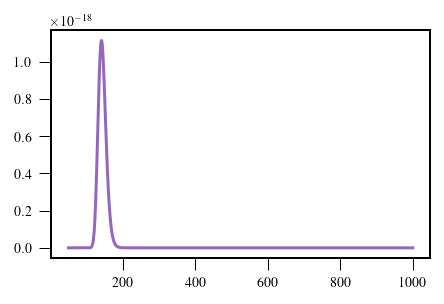

In [42]:
fig, ax1 = plt.subplots()
plt.plot(dx, np.array(valGEDR3), label = "Combined", color = "C4", linestyle='solid')

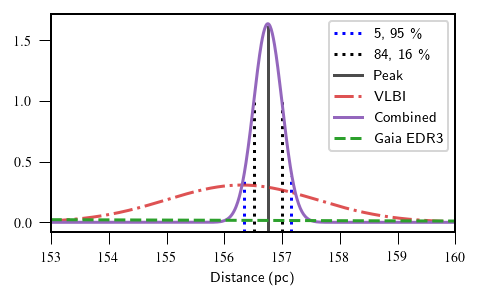

In [43]:
fig, ax1 = plt.subplots()

# percentile
plt.axvline(per_5, ymin=0, ymax=int_5/1.65, color = "b", label = "5, 95 \%", linestyle=":")
plt.axvline(per_84, ymin=0, ymax=int_84/1.65, color = "k", label= "84, 16 \%", linestyle=":")
plt.axvline(per_16, ymin=0, ymax=int_16/1.65, color = "k", linestyle=":")
plt.axvline(per_95, ymin=0, ymax=int_95/1.65, color = "b", linestyle=":")
plt.axvline(dx[peak], ymin=0, ymax=.94, color = "k", label = "Peak", linestyle="-", alpha =.7)

#plt.axvline(156.79, label = r"$D_K$", color = "C5", linestyle='-.') 
#ax1.axvspan(156.79-.25, 156.79+.25, alpha=0.3, color = "C5")

plt.plot(dx, np.array(valD08), label = "VLBI", color = "C3", linestyle ='-.', alpha=.8)

# DM NE 2001 model
#ax1.axvspan(d_DM_NE*.8, d_DM_NE*1.2, alpha=0.2, color = "C0", label = "NE 2001")
#plt.axvline(d_DM_NE, ymin=0, ymax=1, color = "C0", linestyle =':')

# DM YMW16 model
#ax1.axvspan(d_DM_YMW*.8, d_DM_YMW*1.2, alpha=0.2, color = "C1", label = "YMW 16")
#plt.axvline(d_DM_YMW, ymin=0, ymax=1, color = "C1", linestyle =':')

plt.plot(dx, np.array(truecombo), label = "Combined", color = "C4", linestyle='solid')
plt.plot(dx, np.array(valGEDR3)/areaS, label = "Gaia EDR3", color = "C2", linestyle='--')


plt.xlim(153, 160)
#plt.yticks([])
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
plt.savefig("normedDist_J0437_final.pdf")

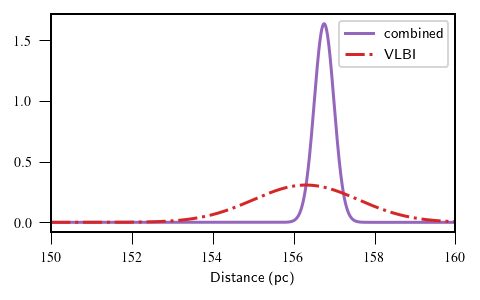

In [44]:
fig, ax1 = plt.subplots()
plt.plot(dx, truecombo, label = "combined", color = "C4", linestyle='solid')


plt.plot(dx, np.array(valD08),label = "VLBI", color = "C3", linestyle ='-.')
#plt.plot(dx, np.array(valR16), label = r"$D_K$", color = "C1", linestyle='-.')

#plt.yticks([])
plt.xlim(150,160)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()

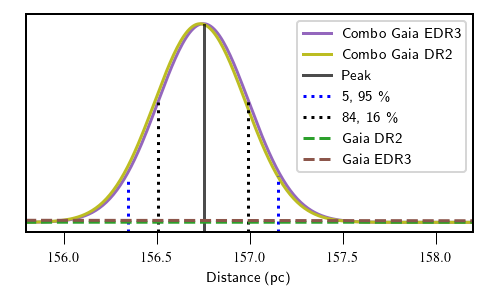

In [45]:
fig, ax1 = plt.subplots()

plt.plot(dx, np.array(truecombo), label = "Combo Gaia EDR3", color = "C4", linestyle='solid')
plt.plot(dx, np.array(combo2norm), label = "Combo Gaia DR2", color = "C8", linestyle='solid')
#plt.plot(dx, np.array(valD08), label = "VLBI", color = "C3", linestyle ='-.')
plt.axvline(dx[peak], ymin=0, ymax=int_50/1.72, color = "k", label = "Peak", linestyle="-", alpha =.7)

plt.axvline(per_5, ymin=0, ymax=int_5/1.65, color = "b", label = "5, 95 \%", linestyle=":")
plt.axvline(per_84, ymin=0, ymax=(int_84/1.65), color = "k", label= "84, 16 \%", linestyle=":")
plt.axvline(per_16, ymin=0, ymax=int_16/1.65, color = "k", linestyle=":")
plt.axvline(per_95, ymin=0, ymax=int_95/1.65, color = "b", linestyle=":")

# DM NE 2001 model
#ax1.axvspan(d_DM_NE*.8, d_DM_NE*1.2, alpha=0.2, color = "C0", label = "NE 2001")
#plt.axvline(d_DM_NE, ymin=0, ymax=1, color = "C0", linestyle =':')

# DM YMW16 model
#ax1.axvspan(d_DM_YMW*.8, d_DM_YMW*1.2, alpha=0.2, color = "C1", label = "YMW 16")
#plt.axvline(d_DM_YMW, ymin=0, ymax=1, color = "C1", linestyle =':')

#plt.axvline(156.79, label = r"$D_K$", color = "C4", linestyle='-.') 
#ax1.axvspan(156.79-.25, 156.79+.25, alpha=0.3, color = "C4")

#plt.plot(dx, np.array(valD08), label = "VLBI", color = "C3", linestyle ='-.', alpha=.3)
plt.plot(dx, np.array(valGDR2)/areabj, label = "Gaia DR2", color = "C2", linestyle='dashed')

#EDR3
plt.plot(dx, np.array(valGEDR3)/areaS, label = "Gaia EDR3", color = "C5", linestyle='dashed')

plt.yticks([])
plt.xlim(155.8,158.2)
plt.xlabel("Distance (pc)")
#plt.ylabel("Probability")
plt.tight_layout()
plt.legend()
plt.savefig("combo_comp_0437.pdf")